This notebook is just used to plot from error data.

In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import pickle #for saving and loading the dataset

import numpy as np
import networkx as nx
import torch
from torch_geometric.data import Data
import time


# In[2]:


import random
from torch_geometric.utils import from_networkx

import matplotlib.pyplot as plt

# In[13]:


# For plotting

# To avoid copying things to GPU memory,
# ideally allocate everything in torch on the GPU
# and avoid non-torch function calls
torch.set_printoptions(precision=10) # Set displayed output precision to 10 digits

from torchquad import enable_cuda # Necessary to enable GPU support
from torchquad import Trapezoid, Simpson, Boole, MonteCarlo, VEGAS # The available integrators
import torchquad


from torch_geometric.nn import SAGEConv

23:44:00|TQ-INFO| Initializing torchquad.


In [3]:
N = 19702 #How large shall the graphs become?
skip = 100 #Should we consider all graphs, or only every skip'th
r = 0.2


with open('l2_errors_10002.pickle', 'rb') as data:
    l2_errors = pickle.load(data)
    
with open('l2_errors_19702.pickle', 'rb') as data:
    l2_errors2 = pickle.load(data)


hi = [tens.item() for tens in l2_errors]
hi2 = [tens.item() for tens in l2_errors2]

hi.extend(hi2)

In [4]:
he = list(range(1,N, skip))

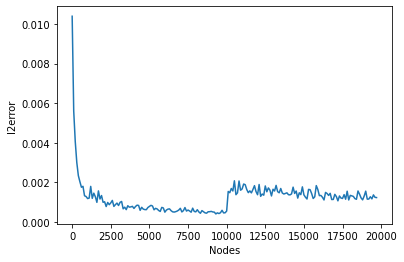

In [5]:
fig = plt.figure()
plt.xlabel('Nodes')
plt.ylabel('l2error')
plt.plot(he,hi[:])

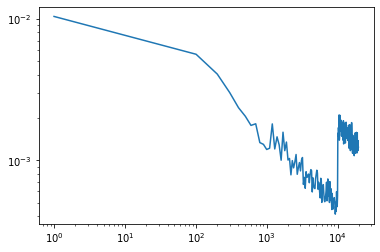

In [6]:
plt.loglog(he,hi[:])

-0.020105383013945505


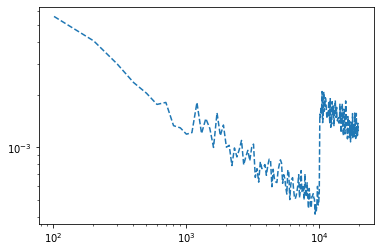

In [7]:
slope, intercept = np.polyfit(np.log(he[1:]), np.log(hi[1:]), 1)
print(slope)
plt.loglog(he[1:], hi[1:], '--')
plt.show()